In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score # Import r2_score and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics # Import the metrics module

In [37]:
gold_dataset=pd.read_csv('/content/gld_price_data.csv')

In [38]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
gold_dataset.shape

(2290, 6)

In [40]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [41]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [42]:
correlation = gold_dataset.drop('Date', axis=1).corr()

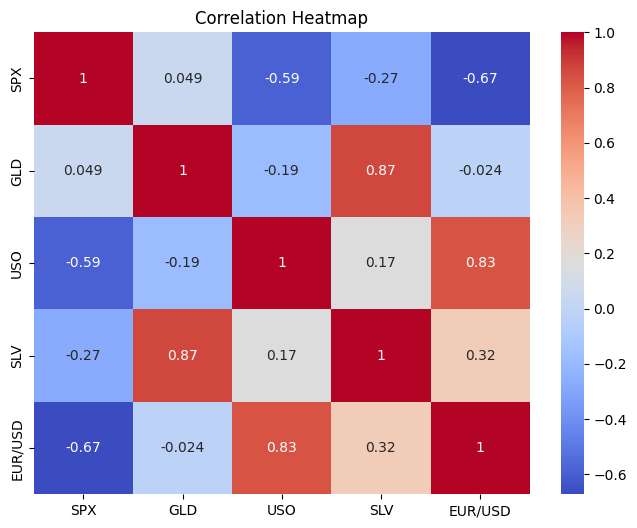

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


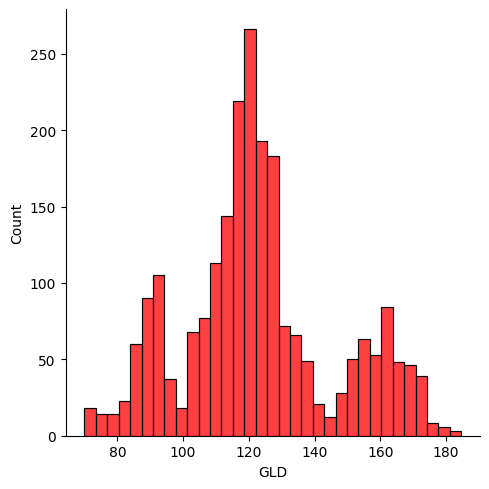

In [45]:
sns.displot(gold_dataset['GLD'],color='red')

In [46]:
X=gold_dataset.drop(['Date','GLD'],axis=1)
Y=gold_dataset['GLD']

In [47]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [48]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
#model selection
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)

In [51]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
#model evaluation
#predic on test data
test_data_prediction=regressor.predict(X_test)

In [53]:
print(test_data_prediction)

[168.63389941  82.24019952 116.12470023 127.65630064 120.9700015
 154.74229794 149.87089825 126.20480033 117.48909876 125.86270129
 116.97070077 172.47200072 141.61679894 167.99259899 115.12980015
 117.59320025 139.06040251 170.23970129 159.37840354 159.87409936
 155.20269996 125.0060999  175.51059834 157.03320269 125.22430051
  93.62369971  77.22680014 120.71350034 119.11559918 167.43639994
  88.08310059 125.42930058  91.00230074 117.63869965 121.06639901
 136.2494007  115.50410096 115.09910076 147.27329968 107.34500107
 104.42890247  87.09709758 126.42660077 117.85329991 154.61679905
 119.48790026 108.22440032 107.94609812  93.19170054 127.15399806
  74.71560051 113.79539908 121.23410038 111.38649913 118.86699918
 120.94979939 159.21890007 167.59810074 147.11839688  85.91039862
  94.3289003   86.89549888  90.49430013 119.04930073 126.48020032
 127.63770031 170.55370003 122.29759943 117.41479883  98.62030057
 167.9393018  142.96979773 131.72750209 121.17790179 121.27659931
 119.700300

In [56]:
#R square error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.9893797899985565


In [59]:
Y_test=list(Y_test)

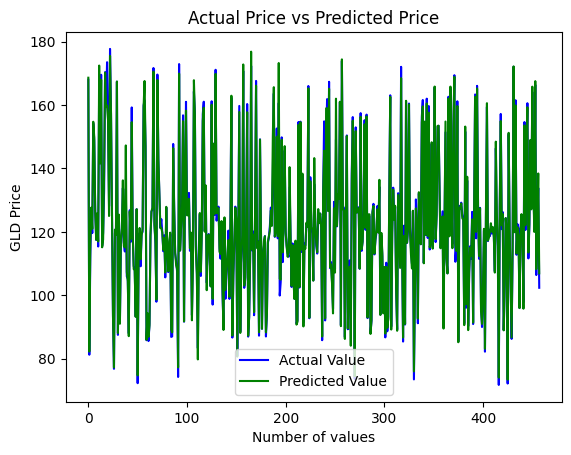

In [60]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()